## Missing value imputation analysis on ML1 Dataset

In [55]:
# Import libraries
import pandas as pd
import numpy as np
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
from sklearn import preprocessing
from statistics import mode, mean

In [5]:
# Set path to the file location
path = 'CleanedDataset.sav'

In [6]:
# Read the data
df, meta = pyreadstat.read_sav(path)

In [7]:
# Sample of rows present in dataset
df.head()

,session_id,session_date,last_update_date,session_last_update_date,referrer,creation_date,session_creation_date,expcomments,numparticipants_actual,numparticipants,...,diseaseforder,quoteorder,flagprimorder,sunkcostorder,anchorinorder,allowedforder,gamblerforder,moneypriorder,imaginedorder,iatorder
0,2400853.0,2013-08-28 12:15:55,8/28/13 12:15,8/28/13 12:15,abington,2013-08-28 11:51:56,2013-08-28 11:51:56,.,,5,...,4.0,3.0,7.0,2.0,8.0,6.0,10.0,1.0,11.0,12.0
1,2400856.0,2013-08-28 12:13:49,8/28/13 12:13,8/28/13 12:13,abington,2013-08-28 11:52:27,2013-08-28 11:52:27,.,,5,...,7.0,5.0,2.0,6.0,11.0,9.0,1.0,4.0,8.0,12.0
2,2400860.0,2013-08-28 12:15:57,8/28/13 12:15,8/28/13 12:15,abington,2013-08-28 11:52:58,2013-08-28 11:52:58,.,,5,...,2.0,8.0,9.0,3.0,5.0,10.0,6.0,4.0,11.0,12.0
3,2400868.0,2013-08-28 12:12:21,8/28/13 12:12,8/28/13 12:12,abington,2013-08-28 11:53:35,2013-08-28 11:53:35,.,,5,...,7.0,8.0,10.0,6.0,9.0,4.0,1.0,11.0,2.0,12.0
4,2400872.0,2013-08-28 12:11:58,8/28/13 12:11,8/28/13 12:11,abington,2013-08-28 11:54:04,2013-08-28 11:54:04,.,,.,...,10.0,3.0,11.0,6.0,9.0,5.0,4.0,1.0,2.0,12.0


In [8]:
# Basic summary statistics
df.describe()

,session_id,age,sample,sunkgroup,sunkDV,gainlossgroup,gainlossDV,anch1group,anch2group,anch3group,...,diseaseforder,quoteorder,flagprimorder,sunkcostorder,anchorinorder,allowedforder,gamblerforder,moneypriorder,imaginedorder,iatorder
count,6.344000e+03,6328.000000,6344.000000,6344.000000,6330.000000,6344.000000,6271.000000,6344.000000,6344.000000,6344.000000,...,6344.000000,6344.000000,6344.000000,6344.000000,6344.000000,6344.000000,6344.000000,6344.000000,6344.000000,6344.0
mean,2.436417e+06,25.975980,17.887295,0.486602,7.553555,0.505675,1.519694,0.435372,0.425284,0.435687,...,6.015290,5.982030,6.063209,5.980927,6.008354,5.971784,5.991015,5.974464,5.973518,12.0
std,9.493816e+04,11.351214,8.196722,0.499860,2.246900,0.500007,0.499652,0.495845,0.494425,0.495886,...,3.181897,3.162875,3.168296,3.152008,3.168915,3.149237,3.126995,3.167903,3.177188,0.0
min,6.196300e+05,12.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.0
25%,2.410160e+06,19.000000,13.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,12.0
50%,2.435912e+06,21.000000,18.000000,0.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,12.0
75%,2.477297e+06,28.000000,23.000000,1.000000,9.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,12.0
max,2.511739e+06,100.000000,36.000000,1.000000,9.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,12.0


In [9]:
# Go through the columns and find the unique values
for col_name in df:
    print(col_name, df[col_name].unique())
    print()

session_id [2400853. 2400856. 2400860. ... 2496023. 2496026. 2496226.]

session_date ['2013-08-28T12:15:55.000000000' '2013-08-28T12:13:49.000000000'
 '2013-08-28T12:15:57.000000000' ... '2013-10-17T13:27:15.000000000'
 '2013-10-17T13:28:16.000000000' '2013-10-17T15:01:41.000000000']

last_update_date ['8/28/13 12:15' '8/28/13 12:13' '8/28/13 12:12' ... '10/17/13 12:35'
 '10/17/13 13:28' '10/17/13 15:01']

session_last_update_date ['8/28/13 12:15' '8/28/13 12:13' '8/28/13 12:12' ... '10/17/13 12:35'
 '10/17/13 13:28' '10/17/13 15:01']

referrer ['abington' 'brasilia' 'charles' 'conncoll' 'csun' 'help' 'ithaca' 'jmu'
 'ku' 'laurier' 'lse' 'luc' 'mcdaniel' 'msvu' 'mturk' 'osu' 'oxy' 'pi'
 'psu' 'qccuny' 'qccuny2' 'sdsu' 'swps' 'swpson' 'tamu' 'tamuc' 'tamuon'
 'tilburg' 'ufl' 'unipd' 'uva' 'vcu' 'wisc' 'wku' 'wl' 'wpi']

creation_date ['2013-08-28T11:51:56.000000000' '2013-08-28T11:52:27.000000000'
 '2013-08-28T11:52:58.000000000' ... '2013-10-17T12:56:29.000000000'
 '2013-10-17T12:56:55

flagtimeestimate4 [nan  3.  1.  2.]

gamblerfallacya [           nan 2.23606798e+00 3.46410162e+00 3.16227766e+00
 6.00000000e+00 1.73205081e+00 2.44948974e+00 1.00000000e+00
 1.00000000e+01 1.46628783e+01 4.24264069e+00 1.41421356e+00
 3.87298335e+00 7.07106781e+00 4.47213595e+00 2.64575131e+00
 3.00000000e+00 2.00000000e+00 4.89897949e+00 1.45602198e+01
 2.82842712e+00 6.48074070e+00 0.00000000e+00 1.41421356e+01
 5.47722558e+00 2.23606798e+01 5.91607978e+00 1.24899960e+01
 5.19615242e+00 1.22474487e+01 5.00000000e+00 1.58113883e+01
 7.54983444e+00 1.36381817e+01 3.74165739e+00 1.03923048e+01
 8.94427191e+00 3.60555128e+00 4.12310563e+00 1.01488916e+01
 1.46969385e+01 4.00000000e+00 1.60000000e+01 1.45945195e+01
 4.58257569e+00 1.25698051e+01 2.13307290e+01 7.41619849e+00
 7.74596669e+00 5.74456265e+00 4.79583152e+00 6.32455532e+00
 1.04880885e+01 1.28062485e+01 1.72046505e+01 1.56843871e+01
 1.91311265e+01 1.02956301e+01 9.16515139e+00 7.34846923e+00
 5.65685425e+00 3.31662479e+00 1

task_url.10 ['//user/kratliff/uflrick/manylabs/manylabs1/flagprimingb.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/quoteb.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/anchoring2a.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/scalesb.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/allowedforbiddena.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/quotea.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/anchoring1b.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/anchoring4b.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/gamblerfallacyb.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/flagpriminga.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/anchorinstruct.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/reciprocityothera.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/flagprimedv1.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/imagineddescribe.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/anchoring3b.html'
 '//user/kratliff/uflrick/many

 2.500e+02 4.000e+04 7.350e+03 2.900e+03 2.200e+03 2.567e+03]

anchoring1bkm [       nan 6.8000e+00 3.0000e+03 2.0000e+03 5.0000e+00 7.0000e+00
 6.0000e+00 8.0000e+03 5.0000e+03 8.0000e+00 7.0000e+03 8.7500e+03
 7.9000e+02 4.0000e+03 6.0000e+03 9.0000e+03 4.5000e+03 4.0000e+00
 8.6660e+00 6.5000e+00 3.0000e+00 7.5000e+03 6.5000e+03 9.9990e+03
 3.0000e+01 1.0000e+04 3.0000e+04 4.0000e+02 8.5000e+03 3.5000e+03
 9.8760e+03 8.7540e+03 8.0000e+02 9.0000e+02 4.3000e+03 7.3650e+03
 2.5000e+03 1.5230e+03 1.0000e+03 7.0000e+02 9.5000e+03 8.6000e+03
 8.5720e+03 5.0000e+02 6.0000e+02 9.0000e+04 3.7000e+02 7.8000e+03
 9.6000e+03 7.4970e+03 4.5660e+03 5.7850e+03 8.9000e+03 5.7000e+03
 8.4000e+03 4.5000e+00 9.9740e+00 2.3000e+03 6.8920e+03 9.7800e+03
 5.4890e+03 1.2500e+03 9.5000e+00 7.5000e+00 7.7410e+03 8.0200e+03
 7.6890e+03 2.2000e+04 7.5510e+03 4.9700e+03 5.2490e+03 7.4000e+03
 7.6220e+03 1.2000e+03 5.2000e+03 6.8000e+03 9.9999e+04 9.8990e+03
 8.2000e+03 2.6000e+03 5.5000e+03 8.7650e+03 6.0430e

### Basic inferences drawn

- Total number of rows * columns is 6344 * 382
- Columns are classified into one of the four categories :
    1.  0 - Text
    2.  1 - Numerical
    3.  2 - Categorical
    4.  3 - Bad

In [10]:
# Numerical variables
num_var = ['age',
 'anchoring1a',
 'anchoring1b',
 'anchoring2a',
 'anchoring2b',
 'anchoring3a',
 'anchoring3b',
 'anchoring4a',
 'anchoring4b',
 'artwarm',
 'gamblerfallacya',
 'gamblerfallacyb',
 'mathwarm',
 'moneyagea',
 'moneyageb',
 'omdimc3rt',
 'omdimc3trt',
 'anchoring1akm',
 'anchoring3ameter',
 'mturk.total.mini.exps',
 'meanlatency',
 'meanerror',
 'block2_meanerror',
 'block3_meanerror',
 'block5_meanerror',
 'block6_meanerror',
 'lat11',
 'lat12',
 'lat21',
 'lat22',
 'sd1',
 'sd2',
 'd_art1',
 'd_art2',
 'd_art',
 'sunkDV',
 'anchoring1',
 'anchoring2',
 'anchoring3',
 'anchoring4',
 'Ranchori',
 'RAN001',
 'RAN002',
 'RAN003',
 'Ranch1',
 'Ranch2',
 'Ranch3',
 'Ranch4',
 'gambfalDV',
 'quotearec',
 'quotebrec',
 'totalflagestimations',
 'totalnoflagtimeestimations',
 'flagdv',
 'Sysjust',
 'Imagineddv',
 'IATexpart',
 'IATexpmath',
 'IATexp.overall',
 'totexpmissed']

cat_var = ['referrer',
 'expgender',
 'exprace',
 'exprunafter',
 'exprunafter2',
 'compensation',
 'recruitment',
 'separatedornot',
 'allowedforbiddena',
 'allowedforbiddenb',
 'citizenship',
 'diseaseframinga',
 'diseaseframingb',
 'ethnicity',
 'flagdv1',
 'flagdv2',
 'flagdv3',
 'flagdv4',
 'flagdv5',
 'flagdv6',
 'flagdv7',
 'flagdv8',
 'flagsupplement1',
 'flagsupplement2',
 'flagsupplement3',
 'flagtimeestimate1',
 'flagtimeestimate2',
 'flagtimeestimate3',
 'flagtimeestimate4',
 'iatexplicitart1',
 'iatexplicitart2',
 'iatexplicitart3',
 'iatexplicitart4',
 'iatexplicitart5',
 'iatexplicitart6',
 'iatexplicitmath1',
 'iatexplicitmath2',
 'iatexplicitmath3',
 'iatexplicitmath4',
 'iatexplicitmath5',
 'iatexplicitmath6',
 'imaginedexplicit1',
 'imaginedexplicit2',
 'imaginedexplicit3',
 'imaginedexplicit4',
 'major',
 'moneygendera',
 'moneygenderb',
 'nativelang',
 'nativelang2',
 'noflagtimeestimate1',
 'noflagtimeestimate2',
 'noflagtimeestimate3',
 'noflagtimeestimate4',
 'omdimc3',
 'politicalid',
 'quotea',
 'quoteb',
 'race',
 'reciprocityothera',
 'reciprocityotherb',
 'reciprocityusa',
 'reciprocityusb',
 'scalesa',
 'scalesb',
 'sex',
 'sunkcosta',
 'sunkcostb',
 'sysjust1',
 'sysjust2',
 'sysjust3',
 'sysjust4',
 'sysjust5',
 'sysjust6',
 'sysjust7',
 'sysjust8',
 'previous_session_schema',
 'us_or_international',
 'lab_or_online',
 'religion',
 'priorexposure1',
 'priorexposure10',
 'priorexposure11',
 'priorexposure12',
 'priorexposure13',
 'priorexposure2',
 'priorexposure3',
 'priorexposure4',
 'priorexposure5',
 'priorexposure6',
 'priorexposure7',
 'priorexposure8',
 'priorexposure9',
 'mturk.non.US',
 'mturk.Submitted.PaymentReq',
 'mturk.duplicate',
 'mturk.exclude.null',
 'mturk.keep',
 'filter_$',
 'order',
 'iat_exclude',
 'o1',
 'o2',
 'o3',
 'o4',
 'o5',
 'o6',
 'o7',
 'o8',
 'o9',
 'o10',
 'o11',
 'scalesorder',
 'reciprocorder',
 'diseaseforder',
 'quoteorder',
 'flagprimorder',
 'sunkcostorder',
 'anchorinorder',
 'allowedforder',
 'gamblerforder',
 'moneypriorder',
 'imaginedorder',
 'sample',
 'sunkgroup',
 'gainlossgroup',
 'gainlossDV',
 'anch1group',
 'anch2group',
 'anch3group',
 'anch4group',
 'gambfalgroup',
 'scalesgroup',
 'scalesreca',
 'scalesrecb',
 'scales',
 'reciprocitygroup',
 'reciprocityother',
 'reciprocityus',
 'allowedforbiddenGroup',
 'allowedforbidden',
 'quoteGroup',
 'flagfilter',
 'flagGroup',
 'MoneyGroup',
 'moneyfilter',
 'ContactGroup',
 'IATfilter',
 'partgender',
 'IATEXPfilter']

bad_var = ['session_id',
 'session_date',
 'last_update_date',
 'session_last_update_date',
 'creation_date',
 'session_creation_date',
 'numparticipants_actual',
 'numparticipants',
 'imptaskto',
 'user_id',
 'session_status',
 'previous_session_id',
 'mturk_worker_id',
 'pi_referrer',
 'user_agent',
 'task_status',
 'task_sequence',
 'session_created_by',
 'study_url',
 'study_name',
 'task_id.0',
 'task_id.1',
 'task_id.2',
 'task_id.3',
 'task_id.4',
 'task_id.5',
 'task_id.6',
 'task_id.7',
 'task_id.8',
 'task_id.9',
 'task_id.10',
 'task_id.11',
 'task_id.12',
 'task_id.13',
 'task_id.14',
 'task_id.15',
 'task_id.16',
 'task_id.17',
 'task_id.18',
 'task_id.19',
 'task_id.20',
 'task_id.21',
 'task_id.22',
 'task_id.23',
 'task_id.24',
 'task_id.25',
 'task_id.26',
 'task_id.27',
 'task_id.28',
 'task_id.29',
 'task_id.30',
 'task_id.31',
 'task_id.32',
 'task_id.33',
 'task_id.34',
 'task_id.35',
 'task_id.36',
 'task_id.37',
 'task_id.38',
 'task_id.39',
 'task_id.40',
 'task_id.41',
 'task_id.42',
 'task_id.43',
 'task_id.44',
 'task_url.0',
 'task_url.1',
 'task_url.2',
 'task_url.3',
 'task_url.4',
 'task_url.5',
 'task_url.6',
 'task_url.7',
 'task_url.8',
 'task_url.9',
 'task_url.10',
 'task_url.11',
 'task_url.12',
 'task_url.13',
 'task_url.14',
 'task_url.15',
 'task_url.16',
 'task_url.17',
 'task_url.18',
 'task_url.19',
 'task_url.20',
 'task_url.21',
 'task_url.22',
 'task_url.23',
 'task_url.24',
 'task_url.25',
 'task_url.26',
 'task_url.27',
 'task_url.28',
 'task_url.29',
 'task_url.30',
 'task_url.31',
 'task_url.32',
 'task_url.33',
 'task_url.34',
 'task_url.35',
 'task_url.36',
 'task_url.37',
 'task_url.38',
 'task_url.39',
 'task_url.40',
 'task_url.41',
 'task_url.42',
 'task_url.43',
 'task_url.44',
 'task_creation_date.0',
 'task_creation_date.1',
 'task_creation_date.2',
 'task_creation_date.3',
 'task_creation_date.4',
 'task_creation_date.5',
 'task_creation_date.6',
 'task_creation_date.7',
 'task_creation_date.8',
 'task_creation_date.9',
 'task_creation_date.10',
 'task_creation_date.11',
 'task_creation_date.12',
 'task_creation_date.13',
 'task_creation_date.14',
 'task_creation_date.15',
 'task_creation_date.16',
 'task_creation_date.17',
 'task_creation_date.18',
 'task_creation_date.19',
 'task_creation_date.20',
 'task_creation_date.21',
 'task_creation_date.22',
 'task_creation_date.23',
 'task_creation_date.24',
 'task_creation_date.25',
 'task_creation_date.26',
 'task_creation_date.27',
 'task_creation_date.28',
 'task_creation_date.29',
 'task_creation_date.30',
 'task_creation_date.31',
 'task_creation_date.32',
 'task_creation_date.33',
 'task_creation_date.34',
 'task_creation_date.35',
 'task_creation_date.36',
 'task_creation_date.37',
 'task_creation_date.38',
 'task_creation_date.39',
 'task_creation_date.40',
 'task_creation_date.41',
 'task_creation_date.42',
 'task_creation_date.43',
 'task_creation_date.44',
 'task_id.45',
 'task_url.45',
 'task_creation_date.45',
 'beginlocaltime',
 'gamblerfallacya_sd',
 'gamblerfallacyb_sd',
 'iatorder',
 'anchoring1bkm',
 'anchoring3bmeter',
 'citizenship2',
 'mturk.exclude']

text_var = ['expcomments', 'feedback', 'imagineddescribe', 'text', 'moneyethnicitya','moneyethnicityb']

In [11]:
# Adding the count of variables across the categories to see if it adds up to 382
len(num_var)+len(cat_var)+len(bad_var)+len(text_var)

382

**382 variables have been classified into four categories.**

In [12]:
# Remove the values '', '.', 'null' and 'NaT' in all the columns
df = df.replace('', np.nan)
df = df.replace('.', np.nan)
df = df.replace('null', np.nan)
df = df.replace('NaT', np.nan)
df = df.replace('n/a', np.nan)
df = df.replace('N/A', np.nan)

In [13]:
# Checking after replacing with Nan's
for col_name in df:
    print(col_name, df[col_name].unique())
    print()

session_id [2400853. 2400856. 2400860. ... 2496023. 2496026. 2496226.]

session_date ['2013-08-28T12:15:55.000000000' '2013-08-28T12:13:49.000000000'
 '2013-08-28T12:15:57.000000000' ... '2013-10-17T13:27:15.000000000'
 '2013-10-17T13:28:16.000000000' '2013-10-17T15:01:41.000000000']

last_update_date ['8/28/13 12:15' '8/28/13 12:13' '8/28/13 12:12' ... '10/17/13 12:35'
 '10/17/13 13:28' '10/17/13 15:01']

session_last_update_date ['8/28/13 12:15' '8/28/13 12:13' '8/28/13 12:12' ... '10/17/13 12:35'
 '10/17/13 13:28' '10/17/13 15:01']

referrer ['abington' 'brasilia' 'charles' 'conncoll' 'csun' 'help' 'ithaca' 'jmu'
 'ku' 'laurier' 'lse' 'luc' 'mcdaniel' 'msvu' 'mturk' 'osu' 'oxy' 'pi'
 'psu' 'qccuny' 'qccuny2' 'sdsu' 'swps' 'swpson' 'tamu' 'tamuc' 'tamuon'
 'tilburg' 'ufl' 'unipd' 'uva' 'vcu' 'wisc' 'wku' 'wl' 'wpi']

creation_date ['2013-08-28T11:51:56.000000000' '2013-08-28T11:52:27.000000000'
 '2013-08-28T11:52:58.000000000' ... '2013-10-17T12:56:29.000000000'
 '2013-10-17T12:56:55

iatexplicitart6 [ 5.  4.  7.  6.  2.  3. nan]

iatexplicitmath1 [ 6.  2.  1.  5.  4.  3. nan]

iatexplicitmath2 [ 6.  4.  2.  5.  3.  1. nan]

iatexplicitmath3 [ 6.  5.  4.  2.  3.  1. nan]

iatexplicitmath4 [ 5.  4.  1.  6.  3.  2. nan]

iatexplicitmath5 [ 5.  3.  2.  6.  4.  1. nan]

iatexplicitmath6 [ 5.  3.  4.  2.  1.  6. nan]

imagineddescribe ['This is interesting. I never knew that. I wonder if he/she thought I was weird for asking that question. Hopefully he/she is okay with what I asked.'
 'I imagined meeting the person on a street. She had a head wrap that was black and white. Her facial features made me felt like she was a harmless and good person.'
 'There is a beach with clean white sand. Tall palm trees. The sun is warm and big.'
 ...
 "Hiking in a forest there is the dirt and roots from the trees all around My dogs are walking just in front of me I can see my brown kinda dirty hiking boots when I look up ahead there is that light at the end of a tunnel feel that I can s

task_url.11 ['//user/kratliff/uflrick/manylabs/manylabs1/flagprimedv1.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/sunkcosta.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/anchoring3a.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/imaginedb.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/anchoring4a.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/anchoring3b.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/quoteb.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/diseaseframingb.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/anchoring4b.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/anchoring2a.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/scalesa.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/flagprimedv2.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/imaginedexplicit.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/allowedforbiddenb.html'
 '//user/kratliff/uflrick/manylabs/manylabs1/gamblerfallacyb.html'
 '//user/kratliff/uflrick/manylabs/

task_id.45 [nan 'debriefing']

task_url.45 [nan '//user/kratliff/uflrick/manylabs/manylabsmturk1/debriefing.jsp'
 '//user/kratliff/uflrick/manylabs/manylabspi1/debriefing.jsp'
 '//user/kratliff/uflrick/manylabs/manylabs1/debriefing.jsp']

task_creation_date.45 [                          'NaT' '2013-08-29T09:57:57.000000000'
 '2013-08-29T10:07:14.000000000' ... '2013-08-09T13:01:49.000000000'
 '2013-08-09T15:16:51.000000000' '2013-08-13T13:45:44.000000000']

beginlocaltime [nan]

mturk.non.US [nan  0.  1.]

mturk.Submitted.PaymentReq [nan  1.]

mturk.total.mini.exps [nan 11. 10.  9.]

mturk.duplicate [nan  0.  1.]

mturk.exclude.null [nan  0.  1.]

mturk.keep [nan  1.  0.]

mturk.exclude [nan  2. 99.]

filter_$ [0. 1.]

order [ 2.  1. nan]

meanlatency [1032.05       1056.43333333 1093.59322034 ... 1092.51666667 1040.13333333
 1119.55      ]

meanerror [0.01666667 0.28333333 0.05084746 0.11666667 0.06666667 0.33898305
 0.15       0.1        0.21666667 0.05       0.2        0.36666667
 0

In [14]:
# Considering variables that are present only in numerical and categorical variables
print("The total number of numerical columns present are ", len(num_var))
print("The total number of categorical columns present are ", len(cat_var))
print("The total number of textual columns present are ", len(text_var))
print("The total number of bad columns present are ", len(bad_var))

The total number of numerical columns present are  60
The total number of categorical columns present are  150
The total number of textual columns present are  6
The total number of bad columns present are  166


In [15]:
print("The total number of useful columns are ", len(num_var)+len(cat_var))

The total number of useful columns are  210


In [16]:
new_df = pd.DataFrame()

In [17]:
# Create a new df with only selected columns
new_df = pd.DataFrame()

for col_name in df:
    if(col_name in num_var or col_name in cat_var):
        new_df[col_name] = df[col_name]

In [18]:
# Check the total number of columns present
new_df.count()

referrer          6344
expgender         2945
exprace           2945
exprunafter       2979
exprunafter2       721
compensation      2980
recruitment       2983
separatedornot    2946
age               6328
sample            6344
sunkgroup         6344
sunkDV            6330
gainlossgroup     6344
gainlossDV        6271
anch1group        6344
anch2group        6344
anch3group        6344
anch4group        6344
anchoring1        5362
anchoring2        5284
anchoring3        5627
anchoring4        5609
Ranchori          5362
RAN001            5284
RAN002            5627
RAN003            5609
Ranch1            5362
Ranch2            5284
Ranch3            5627
Ranch4            5609
                  ... 
lat21             6234
lat22             6257
sd1               6250
sd2               6258
d_art1            6220
d_art2            6213
d_art             6185
iat_exclude       6344
o1                6344
o2                6344
o3                6344
o4                6344
o5         

In [19]:
# Checking all the unique values from each column in order to clean
for col_name in new_df:
    if(col_name in cat_var):
        print(col_name, new_df[col_name].unique())
        print()

referrer ['abington' 'brasilia' 'charles' 'conncoll' 'csun' 'help' 'ithaca' 'jmu'
 'ku' 'laurier' 'lse' 'luc' 'mcdaniel' 'msvu' 'mturk' 'osu' 'oxy' 'pi'
 'psu' 'qccuny' 'qccuny2' 'sdsu' 'swps' 'swpson' 'tamu' 'tamuc' 'tamuon'
 'tilburg' 'ufl' 'unipd' 'uva' 'vcu' 'wisc' 'wku' 'wl' 'wpi']

expgender ['male' 'female' nan 'prefernot']

exprace ['6' '10' 'brazilwhite' 'brazilblack' 'brazilbrown' nan 'chinese' 'malay'
 '8' '7' '5' '9' '2' '3' 'dutch' '1']

exprunafter ['runalone' 'runafter' nan]

exprunafter2 [nan 'Groups' 'GROUPS' 'groups' 'Linear Regression lab' 'GROUP'
 'It was not provided to me' 'Groups.' 'Your past and your future'
 'your past and your future' '-Your past and your future'
 'YOur past and your future' 'Thinking and Reasoning'
 'Thinking and reasoning' 'THinking and Reasoning'
 'Thinking annd Reasoning' 'Thinking and Reasioning'
 'Understanding Social Communication' 'Understanding social situations'
 'understanding social communication' 'Understanding social communicatio

In [20]:
len(new_df.dtypes[new_df.dtypes == object])

40

In [21]:
len(cat_var)

150

Columns to clean are :
- exprunafter2 - Convert all to lower
- nativelang2 - Convert all to lower

In [22]:
# Clean the columns
new_df['exprunafter2'] = new_df['exprunafter2'].str.lower()
new_df['nativelang2'] = new_df['nativelang2'].str.lower()

In [23]:
# Computing the total number of Nans for each column
no_of_nans = {}

for col_name in new_df:
        no_of_nans[col_name] = sum(pd.isna(new_df[col_name]))
print("The total number of columns considered are ", len(no_of_nans))

The total number of columns considered are  210


In [24]:
# After sorting the variables 
no_of_nans_sorted = sorted(no_of_nans.items(), key= lambda kv:(kv[1], kv[0]))

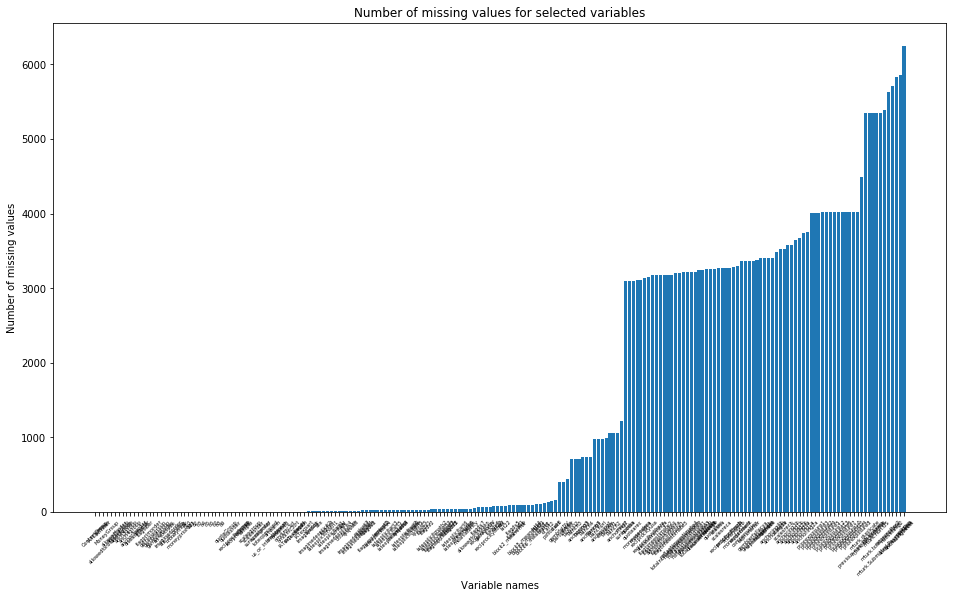

In [25]:
# Plot the variables and then plot them
x_val = [x[0] for x in no_of_nans_sorted]
y_val = [y[1] for y in no_of_nans_sorted]

plt.figure(figsize=(16,9))
plt.bar(x_val, y_val)
plt.xticks(fontsize = 5, rotation='45')
plt.xlabel('Variable names')
plt.ylabel('Number of missing values')
plt.title('Number of missing values for selected variables')
plt.show()

**Note that the above graph is split as two graphs and plotted below.**

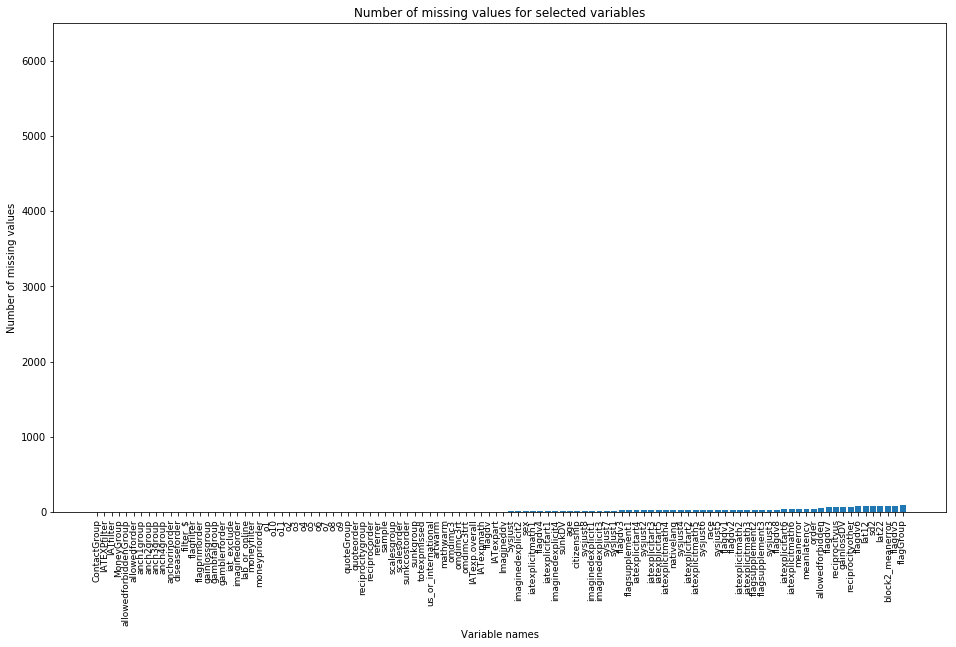

In [26]:
# First 110
plt.figure(figsize=(16,9))
plt.bar(x_val[0:110], y_val[0:110])
plt.xticks(fontsize = 9, rotation='90')
plt.xlabel('Variable names')
plt.ylim(0,6500)
plt.ylabel('Number of missing values')
plt.title('Number of missing values for selected variables')
plt.show()

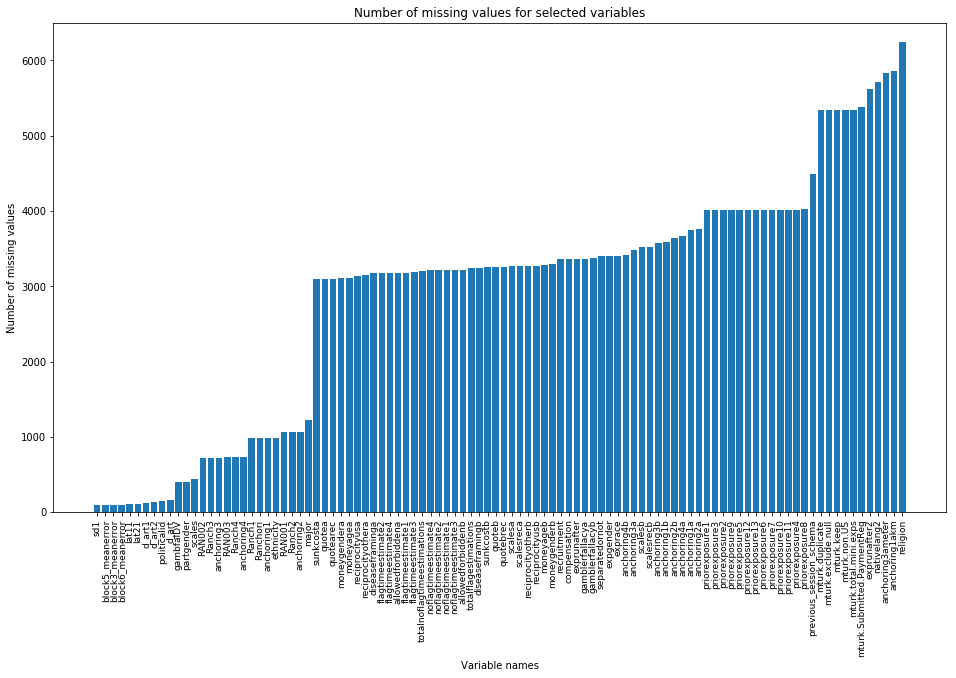

In [27]:
# Remaining
plt.figure(figsize=(16,9))
plt.bar(x_val[110:], y_val[110:])
plt.xticks(fontsize = 9, rotation='90')
plt.xlabel('Variable names')
plt.ylim(0,6500)
plt.ylabel('Number of missing values')
plt.title('Number of missing values for selected variables')
plt.show()

In [28]:
categorical_unique_counts = {}
for i in cat_var:
    categorical_unique_counts[i] = len(new_df[i].unique())

In [29]:
categorical_unique_counts

{'referrer': 36,
 'expgender': 4,
 'exprace': 16,
 'exprunafter': 3,
 'exprunafter2': 38,
 'compensation': 5,
 'recruitment': 7,
 'separatedornot': 5,
 'allowedforbiddena': 3,
 'allowedforbiddenb': 3,
 'citizenship': 102,
 'diseaseframinga': 3,
 'diseaseframingb': 3,
 'ethnicity': 4,
 'flagdv1': 8,
 'flagdv2': 8,
 'flagdv3': 8,
 'flagdv4': 8,
 'flagdv5': 8,
 'flagdv6': 8,
 'flagdv7': 8,
 'flagdv8': 8,
 'flagsupplement1': 12,
 'flagsupplement2': 8,
 'flagsupplement3': 8,
 'flagtimeestimate1': 4,
 'flagtimeestimate2': 4,
 'flagtimeestimate3': 4,
 'flagtimeestimate4': 4,
 'iatexplicitart1': 7,
 'iatexplicitart2': 7,
 'iatexplicitart3': 7,
 'iatexplicitart4': 7,
 'iatexplicitart5': 7,
 'iatexplicitart6': 7,
 'iatexplicitmath1': 7,
 'iatexplicitmath2': 7,
 'iatexplicitmath3': 7,
 'iatexplicitmath4': 7,
 'iatexplicitmath5': 7,
 'iatexplicitmath6': 7,
 'imaginedexplicit1': 10,
 'imaginedexplicit2': 10,
 'imaginedexplicit3': 10,
 'imaginedexplicit4': 10,
 'major': 14,
 'moneygendera': 3,
 'mon

In [30]:
new_df['nativelang'].unique()

array(['english', 'other', 'spanish', nan, 'portuguese', 'czech',
       'slovak', 'malay', 'turkish', 'polish', 'dutch', 'italian'],
      dtype=object)

In [31]:
no_of_nans['nativelang2']

5711

In [32]:
# Things to be removed.
'nativelang2','exprunafter2'

('nativelang2', 'exprunafter2')

In [33]:
no_of_nans['exprunafter2']

5623

### Convert the categorical attributes that are objects to numbers

In [34]:
for col_name in new_df.columns:
    if((col_name in cat_var)):
        new_df[col_name]= new_df[col_name].astype('category')
        new_df[col_name] = new_df[col_name].cat.codes
        
        # If the category is -1 then we need to replace it with np.nan
        new_df[col_name] = new_df[col_name].replace(-1,np.nan)

In [35]:
# Checking all the unique values from each column after transformation
for col_name in new_df:
    if(col_name in cat_var):
        print(col_name, new_df[col_name].unique())
        print()

referrer [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]

expgender [ 1.  0. nan  2.]

exprace [ 5.  1. 11.  9. 10. nan 12. 14.  7.  6.  4.  8.  2.  3. 13.  0.]

exprunafter [ 1.  0. nan]

exprunafter2 [nan 18. 24. 17. 23. 19. 36.  0. 28. 31. 27. 33. 34. 26. 29. 30. 25. 14.
 13. 16. 11. 12. 35. 15. 32.  6.  3.  4.  9.  5.  7.  2.  8.  1. 10. 21.
 22. 20.]

compensation [ 0.  1. nan  3.  2.]

recruitment [ 5. nan  1.  2.  4.  3.  0.]

separatedornot [ 0.  1.  3.  2. nan]

sample [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]

sunkgroup [0 1]

gainlossgroup [0 1]

gainlossDV [ 0.  1. nan]

anch1group [0 1]

anch2group [1 0]

anch3group [1 0]

anch4group [1 0]

gambfalgroup [0 1]

scalesgroup [1 0]

scalesreca [nan  0.  1.]

scalesrecb [ 0. nan  1.]

scales [ 0.  1. nan]

reciprocitygroup [1 0]

reciprocityother [ 0.  1. nan]

reciprocityus [ 1.  0. nan]

allowedf

## Imputing Numeric column value by Mean and Categorical by Mode

In [36]:
# def generate_non_missing_data(threshold, data = new_df, no_of_nans = no_of_nans):
#     """
#     Function to generate non missing data based on threshold, returns a dataframe with reduced columns and reduced rows
#     """
#     length = data.shape[0]
#     threshold = (length * threshold) 
#     drop_columns = list(dict((k, v) for k, v in no_of_nans.items() if v >= threshold).keys())
#     data = data.drop(drop_columns, axis =1)
#     data = data.dropna(axis = 0).reset_index(drop = True)
#     return data

In [37]:
# class Mean_Mode_Impute():
#     def __init__(self, data, variable_type = None):
#         self.data = data
#         self.variable_type = variable_type
#         if self.variable_type == 'Cat':
#             self.value = data.mode()
#         elif self.variable_type == 'Num':
#             self.value = np.mean(data)
    
#     def error(self, test):
#         if self.variable_type == 'Num':
#             return np.mean((test - self.value)**2)
#         elif self.variable_type == 'Cat':
#             return np.mean(org != self.value)
        

In [38]:
# treat_categorical = False
# folds = 10
# hold_out_ratio = 0.1

In [39]:
# num_error = {}
# cat_error = {}
# data = new_df
# while True:
#     y, y_missing_count = get_least_missing_column(data)
#     new_data = data[get_filled_columns(data) + [y]]
#     new_data = new_data[new_data[y].notnull()]
#     # Convert categorical variables to dummy variables
#     if treat_categorical:
#         categorical_variables = list(set(cat_var) & set(get_filled_columns(data)))
#         new_data = pd.get_dummies(new_data, columns= categorical_variables, drop_first= True, dtype= float)
#     # Ends here
#     sample_index = random.sample(list(new_data.index), math.floor(hold_out_ratio * len(data)))
#     hold_out_data = new_data.iloc[sample_index].reset_index(drop = True)
#     train_data = new_data.drop(sample_index, axis = 0).reset_index(drop = True)
#     folds_data = kFold(train_data, k = folds)
#     if y in num_var:
#         best = -1
#         error = []
#         for i in range(folds):
#             training_data = folds_data[i]['Train_data']
#             validation_data = folds_data[i]['Val_data']
#             minimum = min(training_data[y])
#             maximum = max(training_data[y])
#             new =  training_data[y].apply(lambda x : (x - minimum) / (maximum - minimum))
#             ######## Insert the Model here and make changes accordingly
#             mean_model = Mean_Mode_Impute(data = new, variable_type = 'Num')
#             val = validation_data[y].apply(lambda x : (x - minimum) / (maximum - minimum))
#             error.append(mean_model.error(val))
#         if np.mean(error) < best or best == -1:
#             best = np.mean(error)
#             hold = hold_out_data[y].apply(lambda x : (x - minimum) / (maximum - minimum))
#             num_error[y] = mean_model.error(hold)
#             best_model = mean_model
#         data[y][data[y].isnull()] = mean_model.value

#     elif y in cat_var:
#         best = -1
#         error = []
#         for i in range(folds):
#             training_data = folds_data[i]['Train_data']
#             validation_data = folds_data[i]['Val_data']
#             ######## Insert the Model here and make changes accordingly
#             mode_model = Mean_Mode_Impute(data = training_data[y], variable_type = 'Cat')
#             mode_model.error(validation_data[y])
#             error.append(LR_Model.error(validation_data))
#         if np.mean(error) < best or best == -1:
#             best = np.mean(error)
#             num_error[y] = mode_model.error(hold_out_data)
#             best_model = mode_model
#             best_model = mode_model
#         data[y][data[y].isnull()] = mode_model.value

In [40]:
len(cat_var)

150

In [41]:
def estimate_error_mean_mode(new_df = new_df ,cat_var = cat_var, num_var = num_var, folds = 5, missing_ratio= 0.1):
    num_error = {}
    cat_error = {}
    for i in num_var:
        if missing_ratio is None:
            missing_ratio = no_of_nans[i]/new_df.shape[0]
        data = new_df[i].dropna().reset_index(drop = True)
        minimum = min(data)
        maximum = max(data)
        transformed = (data - minimum) / (maximum - minimum)
        org = transformed.copy()
        error_temp = []
        for j in range(folds):
            sample_index = random.sample(list(data.index), math.floor(missing_ratio * len(data)))
            transformed[sample_index] = np.nan
            transformed = transformed.fillna(transformed.mean())
            error_temp.append(np.sum((org - transformed)**2)/len(sample_index))
        num_error[i] = sum(error_temp)/folds

    for i in cat_var:
        if missing_ratio is None:
            missing_ratio = no_of_nans[i]/new_df.shape[0]
        data = new_df[i].dropna().reset_index(drop = True)
        org = data.copy()
        error_temp = []
        for j in range(folds):
            sample_index = random.sample(list(data.index), math.floor(missing_ratio * len(data)))
            data[sample_index] = np.nan
            data = data.fillna(data.mode())
            error_temp.append(sum(org != data)/len(sample_index))
        cat_error[i] = sum(error_temp)/folds

    print("Numeric attributes imputation error : ", sum(num_error.values()))
    print("Categories attributes imputation error : ", sum(cat_error.values()))
    return num_error, cat_error

In [34]:
numerical_error, categorical_error = estimate_error_mean_mode()

Numeric attributes imputation error :  6.484905026645098
Categories attributes imputation error :  39.38519921945228


In [ ]:
numerical_error

## Imputing Numeric column value by Linear Regression and Categorical by Logistic

In [44]:
def get_filled_columns(data):
    curr_missing = data.isna().sum()
    non_missing = curr_missing[curr_missing == 0]
    return list(non_missing.index)

In [45]:
def get_least_missing_column(data):
    curr_missing = data.isna().sum()
    missing = curr_missing[curr_missing != 0]
    return (missing.sort_values().index[0], missing.sort_values()[0])

In [46]:
def kFold(input_data, k = 10):
    temp = list(range(input_data.shape[0]))
    random.shuffle(temp)
    per_fold = math.floor(len(temp)/folds)
    folds_data= {}
    for i in range(folds):
        data = input_data
        start = i * per_fold
        end = (i + 1) * per_fold
        if i == folds - 1:
            folds_data[i] = {}
            folds_data[i]['Val_data'] = data.iloc[temp[start:]]
            folds_data[i]['Train_data'] = data.drop(temp[start:], axis = 0)
        else:
            folds_data[i] = {}
            folds_data[i]['Val_data'] = data.iloc[temp[start:end]]
            folds_data[i]['Train_data'] = data.drop(temp[start:end], axis = 0)
            val_data = data.iloc[temp[start:end]]
    return folds_data

In [47]:
class min_max_scaler():
    def __init__ (self, data, y = None):
        self.data = data
        self.y = y
        self.min_params = {}
        self.max_params = {}
        self.single = {}
        for i in data.columns:
            if (i != self.y) :
                if (len(data[i].unique())>1):
                    self.min_params[i] = min(data[i])
                    self.max_params[i] = max(data[i])
                else:
                    self.single[i] = 0.001
    
    def transform(self, data):
        copy = data.copy()
        for i in data.columns:
            if ((i != self.y) and (i not in self.single.keys())):
                copy[i] = data[i].apply(lambda x : (x- self.min_params[i]) / (self.max_params[i] - self.min_params[i]))
            elif (i in self.single.keys()):
                copy[i] = self.single[i]
            else:
                copy[i] = data[i]
        return copy

### Linear Regression 

In [34]:
class LinearRegression():
    
    def __init__(self, method = None, lambda_value = 0.1):
        self.method = method
        self.lambda_value = lambda_value
        
    def prepare_data(self, data, target):
        data['Bias'] = 1
        self.variables = data.drop(target, axis = 1).columns
        self.X = data.drop(target, axis = 1).values
        data.drop('Bias', axis = 1, inplace = True)
        self.Y = data[target].values
        
    def fit(self, data, target):
        self.data = data
        self.target = target
        self.prepare_data(self.data, self.target)
        
        if self.method == None :
            self.weights = np.matmul(np.linalg.inv(np.matmul(self.X.T, self.X)), np.matmul(self.X.T, self.Y))
        elif self.method == "Ridge" :
            #print(self.X.T)
            #print(np.matmul(self.X.T, self.X))
            self.weights = np.matmul(np.linalg.inv(np.matmul(self.X.T, self.X) + (self.lambda_value * np.identity(self.X.shape[1]))), np.matmul(self.X.T, self.Y))
        elif self.method == "Lasso":
            #print("Working..")
            count_weight = self.X.shape[1]
            self.weights = [0 for i in range(count_weight)]
            while True:
                old_weights = self.weights.copy()
                for i in range(len(self.weights)):
                    denom_value = np.matmul(self.X[:,i].T, self.X[:,i])
                    actual_value = (self.Y - np.matmul(self.X,self.weights))
                    cal_x_upper = (np.matmul((-1 * self.X[:,i].T), actual_value) + (self.lambda_value/2))/ denom_value
                    cal_x_lower = (np.matmul((-1 * self.X[:,i].T), actual_value) - (self.lambda_value/2))/ denom_value
                    if  cal_x_upper < self.weights[i] :
                        self.weights[i] = self.weights[i] + (np.matmul((self.X[:,i].T),actual_value) - (self.lambda_value/2))/ denom_value
                    elif cal_x_lower > self.weights[i] :
                        self.weights[i] = self.weights[i] +(np.matmul((self.X[:,i].T),actual_value) + (self.lambda_value/2))/ denom_value
                    else:
                        self.weights[i] = 0
                #Stopping criteria
                updates = [k - l for k, l in zip(old_weights, self.weights)]
                if max(updates) < 1e-2 and abs(min(updates)) < 1e-2:
                    break


    def predict_row(self, row):
        y_pred = np.sum(np.multiply(self.weights, row))
        return y_pred
        
    def predict(self,test):
        test['bias'] = 1
        y_predicted = []
        for index,row in test.iterrows():
            y_predicted.append(self.predict_row(row))
        return y_predicted
    
    def training_error(self):
        predicted_y = self.predict(self.data.drop(self.target, axis = 1))
        mse = []
        for i in range(len(predicted_y)):
            err = ((predicted_y[i] - self.Y[i])**2)
            mse.append(err)
        return sum(mse)/len(mse)
    
    def error(self, test):
        test = test.reset_index(drop = True)
        predicted_y = self.predict(test.drop(self.target, axis = 1))
        mse = []
        for i in range(len(predicted_y)):
            err = ((predicted_y[i] - test[self.target][i])**2)
            mse.append(err)
        return sum(mse)/len(mse)

### Logistic Regression 

In [35]:
class Logistic_Regression():
    
    def __init__(self, X, Y, no_of_epochs=1000, learning_rate=0.001, intercept=True, verbose=True):
        self.X = X
        self.Y = Y
        self.W = None
        self.intercept = intercept
        self.epochs = no_of_epochs
        self.lr = learning_rate
        self.verbose = verbose
    
    def _add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept, X), axis=1)
    
    def _sigmoid_function(self, X):
        return  1 / (1+np.exp(-X))
    
    def _loss_function(self, X, Y):
        return (-Y * np.log(X) - (1-Y) * np.log(1-X) ).mean()
    
    def _predict_probs(self, X):
        if(self.intercept):
            X = self._add_intercept(X)
        return (self._sigmoid_function(np.dot(X,self.W)))
    
    def predict(self, X):
        return self._predict_probs(X)>=0.5
    
    def error(self, X, y):
        preds = self.predict(X)
        return (preds != y).mean()
    
    def accuracy(self, X, y):
        preds = self.predict(X)
        return (preds == y).mean()
    
    def fit(self):
        if(self.intercept):
            self.X = self._add_intercept(self.X)
        
        self.W = np.zeros(self.X.shape[1])
        
        iterations = 0
        
        while(iterations<self.epochs):
            iterations += 1
            pred = self._sigmoid_function(np.dot(self.X, self.W))
            diff = (pred - self.Y)
            self.W -= (self.lr * (np.dot(self.X.T, diff)/self.Y.shape))
            
            predicted = self._sigmoid_function(np.dot(self.X, self.W))
            cost = self._loss_function(predicted, self.Y)
            if(self.verbose):
                print("Cost: ", cost)
#         print("Cost: ", cost)

In [41]:
class MultiClass_Logistic_Regression():
    
    def __init__(self, X, Y, intercept=True, no_of_epochs=1000, learning_rate=0.1, batch_size=100, verbose=True):
        self.X = X
        self.Y = Y
        self.W = None
        self.intercept = intercept
        self.epochs = no_of_epochs
        self.lr = learning_rate
        self.verbose = verbose
        self.batch_size = batch_size
    
    def _add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return (np.concatenate((intercept,X), axis=1))
    
    def _y_one_hot_encode(self):
        self.Y = (np.arange(np.max(self.Y) + 1) == self.Y[:, None]).astype(float)
    
    def _softmax_function(self, X):
        z = X
        e_x = np.exp(z)
        out = e_x / (1 + e_x.sum(axis = 1, keepdims = True))
#         print(out.sum(axis=1))
        return out
        # To avoid overflow
#         X = X - np.max(X)
#         return (np.exp(X).T/np.sum(np.exp(X),axis=1)).T
    
    def _loss_function(self, X, Y):
        return (- np.sum(Y * np.log(X), axis=1))
    
    def _predict_prob(self, X):
        if(self.intercept):
            X = self._add_intercept(X)
        return (self._softmax_function(np.dot(X,self.W)))
    
    def predict(self, X):
        return np.argmax(self._predict_prob(X), axis=1)
    
    def error(self, X, y):
        preds = self.predict(X)
        return (preds != y).mean()
    
    def accuracy(self, X, y):
        preds = self.predict(X)
        return (preds == y).mean()
    
    def fit(self):
        if(self.intercept):
            self.X = self._add_intercept(self.X)
            
        self._y_one_hot_encode()
        self.W = np.zeros((self.X.shape[1], self.Y.shape[1]))
        
        iterations = 0
        
        while(iterations < self.epochs):
            iterations += 1
            
            for i in range(0, self.X.shape[0], self.batch_size):
                x_batch = self.X[i:i+self.batch_size]
                y_batch = self.Y[i:i+self.batch_size]
                
                z = np.dot(x_batch, self.W)
                pred = self._softmax_function(z)
                diff = (pred - y_batch)
                
                self.W -= (self.lr * (np.dot(x_batch.T, diff)))
#                 print(self.W)

#### Frame work to use ML models to impute missing values

In [ ]:
# Initiation and parameters
num_error = {}
cat_error = {}
data = new_df.copy()
hold_out_ratio = 0.1
folds = 5
param1 = ['Ridge']
param2 = [0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 5]
param3 = [30,50,100,150,200,500,1000]
param4 = [0.001, 0.01, 0.05, 0.1,0.5]

while(True):
    y, y_missing_count = get_least_missing_column(data)
#     y = 'sysjust8'
    new_data = data[get_filled_columns(data) + [y]].copy()

    # Convert categorical variables to dummy variables
    categorical_variables = list(set(cat_var) & set(get_filled_columns(new_data)))
    new_data = pd.get_dummies(new_data, columns= categorical_variables, drop_first= True, dtype= float)

    # Ends here
    model_data = new_data[new_data[y].notnull()].copy()
    sample_index = random.sample(list(model_data.index), math.floor(hold_out_ratio * len(model_data)))
    # Hold out data has the data based on teh hold out ratio
    hold_out_data = model_data.loc[sample_index].reset_index(drop = True)
    train_data = model_data.drop(sample_index, axis = 0).reset_index(drop = True)
    folds_data = kFold(train_data, k = folds)
    if y in num_var:
        print("num", y)
        best = -1
        for j in param1:
            for k in param2:
                error = []
                for i in range(folds):
                    training_data = folds_data[i]['Train_data']
                    validation_data = folds_data[i]['Val_data']
                    scaler = min_max_scaler(training_data)
                    training_data = scaler.transform(training_data)
                    validation_data = scaler.transform(validation_data)
                    ######## Insert the Model here and make changes accordingly
                    LR_Model = LinearRegression(method= j, lambda_value= k)
                    LR_Model.fit(training_data, y)
                    error.append(LR_Model.error(validation_data))
                if np.mean(error) < best or best == -1:
                    best = np.mean(error)
                    hold_out_data = scaler.transform(hold_out_data)
                    num_error[y] = LR_Model.error(hold_out_data)
                    best_model = LR_Model
        print("Error : ", num_error[y])
        for index, row in new_data[new_data[y].isna()].drop(y,axis = 1).iterrows():
            #print(index)
            row['Bias'] = 1.0
            data.at[index ,y] = best_model.predict_row(row)

    elif y in cat_var:
        print("cat", y)
        best = -1
        for j in param3:
            for k in param4:
                error = []
                for i in range(folds):
                    training_data = folds_data[i]['Train_data']
                    no_of_un_classes = len(training_data[y].unique())
#                     print("Classes: ", no_of_un_classes)
                    
                    validation_data = folds_data[i]['Val_data']
                    scaler = min_max_scaler(training_data,y)
                    training_data = scaler.transform(training_data)
                    validation_data = scaler.transform(validation_data)
                    ######## Insert the Model here and make changes accordingly
                    if(no_of_un_classes == 2):
#                         print("Binary")
                        Log_Model = Logistic_Regression(X=training_data.drop(y,axis = 1),Y=training_data[y],
                                                        no_of_epochs=j,learning_rate=k,verbose=False)
#                         print(np.any(training_data.drop(y,axis = 1).values))
#                         print(training_data.drop(y,axis = 1).isnull().values.any())
                    else:
#                         print("Multi Class")
#                         Log_Model = MultiClassLogisticRegression(epochs = 100, batch_size = 60, learning_rate = 0.005)
                        Log_Model = MultiClass_Logistic_Regression(X=training_data.drop(y,axis = 1),Y=training_data[y],
                                                                   no_of_epochs=j,learning_rate=k ,verbose=False)
#                         print(training_data.drop(y,axis = 1).isnull().values.any())
#                         Log_Model.fit()
#                         print(Log_Model.W)
#                         Log_Model.fit(training_data.drop(y,axis = 1).values,training_data[y].values)
#                         print(Log_Model.weights)
                    Log_Model.fit()
#                     print("Accuracy: ", Log_Model.accuracy(training_data.drop(y,axis = 1),training_data[y]))
                    X_valid= validation_data.drop(y,axis = 1)
                    Y_valid = validation_data[y]
                    error.append(Log_Model.error(X_valid,Y_valid))
                if np.mean(error) < best or best == -1:
                    best = np.mean(error)
                    hold_out_data = scaler.transform(hold_out_data)
                    hold_out_X_valid= hold_out_data.drop(y,axis = 1)
                    hold_out_y_valid = hold_out_data[y]
                    cat_error[y] = Log_Model.error(hold_out_X_valid,hold_out_y_valid)
                    best_model = Log_Model
        print("Error : ", cat_error[y])
        for index, row in new_data[new_data[y].isna()].drop(y,axis = 1).iterrows():
            #print(index)
            row=np.array(row)
            row=np.reshape(row,(1,len(row)))
            data.at[index ,y] = best_model.predict(row)

num artwarm
Error :  0.5743321374010305
num mathwarm
Error :  0.5279830978004736
cat omdimc3
Error :  0.20662460567823343
num omdimc3trt
Error :  0.00095493143284662
num omdimc3rt
Error :  6.025003936779039e-07
num flagdv
Error :  0.5051041542796406
num IATexpmath
Error :  0.36852172609966066
num IATexp.overall
Error :  1.5220632609340448
num IATexpart
Error :  0.0001062320021037099
num Imagineddv
Error :  0.0907951972726444
cat sex
Error :  0.325434439178515
num Sysjust
Error :  0.2560763612216631
cat imaginedexplicit2


C:\Users\nitin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


Error :  0.8467614533965245
cat iatexplicitmath1
Error :  0.8988941548183255
cat flagdv4
Error :  0.3807266982622433
cat iatexplicitart1
Error :  0.9747235387045814
cat imaginedexplicit4
Error :  0.8056872037914692
num sunkDV
Error :  0.8923098679403745
cat citizenship
Error :  0.10284810126582279
num age
Error :  0.1726420581852231
cat sysjust8
Error :  0.814873417721519
cat imaginedexplicit3
Error :  0.9018987341772152
cat imaginedexplicit1
Error :  0.9208860759493671
cat sysjust7
Error :  0.8939873417721519
cat sysjust1
Error :  0.6740506329113924
cat flagdv3
Error :  0.7753164556962026
cat flagsupplement1
Error :  0.6281645569620253
cat iatexplicitart4
Error :  0.9001584786053882
cat sysjust2
Error :  0.624405705229794
cat iatexplicitart3
Error :  0.9270998415213946
cat iatexplicitart5
Error :  0.9540412044374009
cat iatexplicitmath4
Error :  0.9049128367670365
cat nativelang
Error :  0.10142630744849446
cat sysjust4
Error :  0.722662440570523
cat iatexplicitmath5
Error :  0.841521

Bad columns = 'anchoring1bkm', 'anchoring3bmeter', 'citizenship2', 'mturk.exclude'

## Imputing using EM Algorithm

In [84]:
# Create a df with only numerical variables from new_df
num_df = new_df.loc[:, num_var].copy()

In [85]:
# Check the length of the numerical dataframe 
print("The length of the numerical dataframe is ", len(num_df.columns))
print("The total number of numerical dataframe are ", len(num_df))

The length of the numerical dataframe is  60
The total number of numerical dataframe are  6344


In [90]:
sum(num_df.isna().sum(axis = 1) == 0)

0

In [37]:
def EM(data, loops = 50):
    
    nulls_present = np.argwhere(np.isnan(data))
    
    # For each row and column in the null columns
    for row, col in nulls_present:
        # Select a column with missing value
        cur_col = data[:, int(col)]
        
        # Compute the mean and sd of the column selected without the missing value
        mu = cur_col[~np.isnan(cur_col)].mean()
        std = cur_col[~np.isnan(cur_col)].std()
        
        # Fill the missing values with a random distribution - with the computed mean and sd
        cur_col[row] = np.random.normal(loc=mu, scale=std)
        
        prev, i = 1, 1
        
        for i in range(loops):
            # Expectation
            # Recompute the mean and sd after replacing the new missing value
            mu = cur_col[~np.isnan(cur_col)].mean()
            std = cur_col[~np.isnan(cur_col)].std()
            
            # Maximization
            # Fill the missing value again with the newly estimated mean and sd
            cur_col[row] = np.random.normal(loc=mu, scale=std)
            
            # If likelihood doesn't change by atleast 10% the loop breaks
            # Min number of runs = 5
            delta_val = (cur_col[row] - prev)/prev
            
            if (i > 5 and delta_val < 0.1):
                data[row][col] = cur_col[row]
                break
            data[row][col] = cur_col[row]
            prev = cur_col[row]
    
    return data

**Note** - The input array needs to be converted to a numpy array before being sent as an input.

In [38]:
new_filled_data = EM(np.array(num_df), loops = 100)

## Imputing using Neural Networks

In [113]:
class NeuralNetwork():
    
    def __init__(self, X = None , y = None, layers = [5, 2], learning_rate = 0.01, 
                epochs = 5, method = 'Linear', tol = 0.1, batch_size = 250):
        self.weights = None
        self.X = X
        self.y = y
        self.activationHidden = self.sigmoid
        self.method = method
        if self.method == 'Linear':
            self.activationOut = self.linear
            self.derivate_out = self.linear_der
            self.out_class = 'Linear'
        elif self.method == 'Classification' and len(np.unique(self.y)) == 2:
            self.out_class = 'Binary'
            self.activationOut = self.sigmoid
            self.derivate_out = self.sigmoid_der
        elif self.method == 'Classification' and len(np.unique(self.y)) > 2:
            self.out_class = 'MultiClass'
        self.layers = layers
            #self.activationOut = self.softmax
            #self.derivate_out = self.softmax_der
        self.derivate_rest = self.sigmoid_der
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tol = tol
        self.batch_size = batch_size
        

    def weightsInitialisation(self):
        #Initialising a numpy array of dim(hiddenlayers, neurons) to store weights
        self.weights = []
        for i in range(len(self.layers)):
            temp = []
            for j in range(self.layers[i]):
                #first hidden layer
                if i == 0:
                    temp.append(np.random.normal(0,0.4, size = 1 + self.X.shape[1]))
                #rest hidden layers
                else:
                    temp.append(np.random.normal(0,0.4, size = 1 + self.layers[i-1]))
            self.weights.append(temp)
        #Weights for the final output layer
        if self.out_class == 'MultiClass':
            self.outputLayerWeights =  np.random.normal(0,0.4, size = ( len(np.unique(self.y)), 1 + self.layers[-1]))
        else:
            self.outputLayerWeights =  np.random.normal(0,0.4, size = 1 + self.layers[-1])
    
    def gradientInitialisation(self):
        self.gradient = []
        for i in range(len(self.layers)):
            temp = []
            for j in range(self.layers[i]):
                #first hidden layer
                if i == 0:
                    temp.append(np.zeros(1 + self.X.shape[1]))
                #rest hidden layers
                else:
                    temp.append(np.zeros(1 + self.layers[i-1]))
            self.gradient.append(temp)
        if self.out_class == 'MultiClass':
            self.gradientOutputLayer = np.zeros(shape = (len(np.unique(self.y)), 1 + self.layers[-1]))
        else:
            self.gradientOutputLayer = [0] * len(self.outputLayerWeights)
    
    def sigmoid(self,x):
        if x < 0:
            return 1 - 1 / (1 + math.exp(x))
        else:
            return 1 / (1 + math.exp(-x))
    
    def linear(self,x):
        return x
    
    def sigmoid_der(self,x):  
        return self.sigmoid(x) *(1 - self.sigmoid(x))

    def linear_der(self, x):
        return 1.0
    
    def softmax(self,x):
        shiftx = x - np.max(x)
        exps = np.exp(shiftx)
        return exps / np.sum(exps)
    
    def squareErrorLoss(self,x,y):
        return (self.feedForward(x) - y)**2
    
    def error(self, X, y):
        if self.out_class == 'Linear':
            pred= []
            for i in X:
                pred.append(self.feedForward(i))
            return mean([(a_i - b_i)**2 for a_i, b_i in zip(pred, y)])
        elif self.out_class == 'Binary':
            error = 0
            for i in range(len(X)):
                prob = self.feedForward(X[i])
                if (prob <0.5 and y[i] == 1) or (prob >=0.5 and y[i] == 0):
                    error = error + 1
            return error/X.shape[0]
        elif self.out_class == 'MultiClass':
            error = 0
            y = self.onehotencoding(y)
            for i in range(len(X)):
                prob = self.feedForward(X[i])
                class_pred = list(prob).index(max(prob))
                if class_pred != list(y[i]).index(1):
                    error = error + 1
            return error/X.shape[0]


    def predict(self,X):
        pred = []
        for i in X:
            pred.append(self.feedForward(i))
        return pred

    def predict_row(self,X):
        out = self.feedForward(X)
        if self.out_class == 'Linear':
            return out
        elif self.out_class == 'Binary':
            if out >= 0.5:
                return 1
            else:
                return 0
        elif self.out_class == 'MultiClass':
            return list(out).index(max(out))
    
    def loss(self, pred, actual):
        if self.method == 'Linear' or self.out_class == 'Binary':
            return 2.0 * (pred- actual)
        #elif self.out_class == 'Binary':
            #return 
        elif self.out_class == 'MultiClass':
            p = np.dot(pred,actual)
            return (-1/math.log(p))
        
    def softmax_der(self, pred, actual, l):
        if actual[l] == 1:
            return pred[l]*(1 - pred[l])
        else:
            i = list(actual).index(1)
            return -1*pred[l]*pred[i]

    def onehotencoding(self, y):
        out = np.zeros((len(y),int(np.max(y)+1)))
        for i in range(len(y)):
            out[i][int(y[i])] = 1
        return out

    def feedForward(self, x):
        self.x = np.append(x, 1.0)
        self.out = []
        for i in range(len(self.layers) + 1):
            outputFromCurrLayer = []
            #For first Layer
            if i == 0:
                for j in range(self.layers[i]):
                    z = self.activationHidden(np.dot(self.weights[i][j],self.x))
                    outputFromCurrLayer.append(z)
                temp = outputFromCurrLayer.copy()
                self.out.append(temp)
                outputFromCurrLayer.append(1.0)
                outputFromPrevLayer = outputFromCurrLayer.copy()
            #Output Layer
            elif i == len(self.layers) and self.out_class == 'MultiClass':
                return self.softmax(np.matmul(self.outputLayerWeights, outputFromPrevLayer))
            elif i == len(self.layers):
                return self.activationOut(np.dot(self.outputLayerWeights,outputFromPrevLayer))
            #Rest all Layers
            else:
                for j in range(self.layers[i]):
                    z = self.activationHidden(np.dot(self.weights[i][j],outputFromPrevLayer))
                    outputFromCurrLayer.append(z)
                temp = outputFromCurrLayer.copy()
                self.out.append(temp)
                outputFromCurrLayer.append(1.0)
                outputFromPrevLayer = outputFromCurrLayer.copy()

    def backProp(self, pred, actual):
        #Weight updation for Output Layer
        if self.out_class == 'Linear' or self.out_class == 'Binary':
            delta = []
            der_outter_layer = self.derivate_out(np.dot(np.append(self.out[len(self.layers) -1], 1.0) , self.outputLayerWeights))
            for i in range(len(self.outputLayerWeights)):
                if i == len(self.outputLayerWeights) - 1:
                    self.gradientOutputLayer[i] = self.gradientOutputLayer[i] + (self.loss(pred, actual) * der_outter_layer * 1)
                else :
                    d = self.loss(pred, actual) * der_outter_layer * self.outputLayerWeights[i]
                    self.gradientOutputLayer[i] = self.gradientOutputLayer[i] + (self.loss(pred, actual) * der_outter_layer * self.out[len(self.layers) -1][i])
                    delta.append(d) 
        elif self.out_class == 'MultiClass':
            delta = [0] * self.layers[-1]
            for l in range(len(self.outputLayerWeights)):
                der_outter_layer = self.softmax_der(pred,actual, l)
                for i in range(len(self.outputLayerWeights[l])):
                    if i == len(self.outputLayerWeights[l]) - 1:
                        self.gradientOutputLayer[l][i] = self.gradientOutputLayer[l][i] + (self.loss(pred, actual) * der_outter_layer * 1)
                    else:
                        d = self.loss(pred, actual) * der_outter_layer * self.outputLayerWeights[l][i]
                        delta[i] = delta[i] + d
                        self.gradientOutputLayer[l][i] = self.gradientOutputLayer[l][i] + (self.loss(pred, actual) * der_outter_layer * self.out[len(self.layers) - 1][i])       

        #For all other Layers
        for l in reversed(range(len(self.layers))):
            delta_forward = delta.copy()
            delta = [0] * self.layers[l-1]
            #For the first layer
            if l == 0 :
                for j in range(self.layers[l]):
                    der_layer = self.derivate_rest(np.dot(self.x , self.weights[l][j]))
                    for i in range(len(self.weights[l][j])):
                        if i == len(self.weights[l][j]) - 1:
                            self.gradient[l][j][i] = self.gradient[l][j][i] +  (delta_forward[j] * der_layer * 1.0)
                        else :
                            self.gradient[l][j][i] = self.gradient[l][j][i] +   (delta_forward[j] * der_layer * self.x[i])
            #Rest all the layers
            else :
                for j in range(self.layers[l]):
                    der_layer = self.derivate_rest(np.dot(np.append(self.out[l - 1], 1.0) , self.weights[l][j]))
                    for i in range(len(self.weights[l][j])):
                        if i == len(self.weights[l][j]) - 1:
                            self.gradient[l][j][i] = self.gradient[l][j][i] +  (delta_forward[j] * der_layer * 1.0)
                        else :
                            d = delta_forward[j] * der_layer * self.weights[l][j][i]
                            delta[i] = delta[i] + d
                            self.gradient[l][j][i] = self.gradient[l][j][i] + (delta_forward[j] * der_layer * self.out[l - 1][i])
    
    def updateWeights(self, n):
        if self.out_class == 'Linear' and self.out_class == 'Binary':
            for i in range(len(self.outputLayerWeights)):
                self.outputLayerWeights[i] = self.outputLayerWeights[i] - (self.learning_rate *  self.gradientOutputLayer[i]/n)
        elif self.out_class =='MultiClass':
            for l in range(len(self.outputLayerWeights)):
                for i in range(len(self.outputLayerWeights[l])):
                    self.outputLayerWeights[l][i] = self.outputLayerWeights[l][i] - (self.learning_rate *  self.gradientOutputLayer[l][i]/n)
        #For all other Layers
        for l in reversed(range(len(self.layers))):
            for j in range(self.layers[l]):
                for i in range(len(self.weights[l][j])):
                    self.weights[l][j][i] = self.weights[l][j][i] - (self.learning_rate *  self.gradient[l][j][i] /n)

    
    def fit(self,X,y,X_val = None, Y_val = None):
        self.X = X
        self.y = y
        if self.out_class == 'MultiClass':
            y = self.onehotencoding(y)
        self.weightsInitialisation()
        self.gradientInitialisation()
        i = 0
        error_val_old = -1
        tol_count = 0
        while i < self.epochs:
            for j in range(len(X)):
                if j%self.batch_size ==0 and j != 0 or j == len(X) -1:
                    if j == len(X) -1:
                        self.updateWeights(j%self.batch_size)
                    else:
                        self.updateWeights(self.batch_size)
                    self.gradientInitialisation()
                    p = self.feedForward(X[j])
                    self.backProp(p,y[j])
                else:
                    p = self.feedForward(X[j])
                    self.backProp(p,y[j])
            #print(nn.weights)
#             if X_val is not None and Y_val is not None:
#                 error_curr_val = self.error(X_val, Y_val)
#                 print("Epoch : {} and MSE_Train : {} and MSE_Val : {}".format(i, self.error(X,y), error_curr_val))
#                 if abs(error_val_old -error_curr_val) < self.tol :
#                     tol_count = tol_count + 1
#                     error_val_old = error_curr_val
#                     if tol_count >1 :
#                         print("Stopping as validation error did not improve more than tol = {} for 2 iterations".format(self.tol))
#                         break
#                 else:
#                     tol_count = 0
#                     error_val_old = error_curr_val
#             else:
#                 print("Epoch : {} and MSE : {}".format(i, self.error(X,y)))
            i = i+1

In [116]:
# Initiation and parameters
#num_error = {}
#cat_error = {}
#data = new_df.copy()
hold_out_ratio = 0.1
folds = 2
param1 = [[5,5]] #, #[5,5]]
param2 = [0.1]
param3 = [[5,5]]
param4 = [0.1]

while(True):
    y, y_missing_count = get_least_missing_column(data)
#     y = 'sysjust8'
    new_data = data[get_filled_columns(data) + [y]].copy()

    # Convert categorical variables to dummy variables
    categorical_variables = list(set(cat_var) & set(get_filled_columns(new_data)))
    new_data = pd.get_dummies(new_data, columns= categorical_variables, drop_first= True, dtype= float)

    # Ends here
    model_data = new_data[new_data[y].notnull()].copy()
    sample_index = random.sample(list(model_data.index), math.floor(hold_out_ratio * len(model_data)))
    # Hold out data has the data based on teh hold out ratio
    hold_out_data = model_data.loc[sample_index].reset_index(drop = True)
    train_data = model_data.drop(sample_index, axis = 0).reset_index(drop = True)
    folds_data = kFold(train_data, k = folds)
    if y in num_var:
        print("num", y)
        best = -1
        for j in param1:
            for k in param2:
                error = []
                for i in range(folds):
                    training_data = folds_data[i]['Train_data']
                    validation_data = folds_data[i]['Val_data']
                    scaler = min_max_scaler(training_data)
                    training_data = scaler.transform(training_data)
                    validation_data = scaler.transform(validation_data)
                    ######## Insert the Model here and make changes accordingly
                    NN_Model = NeuralNetwork(X = training_data.drop(y, axis = 1).values, y = np.array(training_data[y]) , 
                                             layers = j, learning_rate = k, method = 'Linear')
                    NN_Model.fit(X = training_data.drop(y, axis = 1).values, y = np.array(training_data[y]))
                    error.append(NN_Model.error(validation_data.drop(y,axis = 1).values, y = np.array(validation_data[y])))
                if np.mean(error) < best or best == -1:
                    best = np.mean(error)
                    hold_out_data = scaler.transform(hold_out_data)
                    num_error[y] = NN_Model.error(hold_out_data.drop(y,axis = 1).values,np.array(hold_out_data[y]) )
                    best_model = NN_Model
        print("Error : ", num_error[y])
        for index, row in new_data[new_data[y].isna()].drop(y,axis = 1).iterrows():
            data.at[index ,y] = best_model.predict_row(row)

    elif y in cat_var:
        print("cat", y)
        best = -1
        for j in param3:
            for k in param4:
                error = []
                for i in range(folds):
                    training_data = folds_data[i]['Train_data']
                    no_of_un_classes = len(training_data[y].unique())
                    validation_data = folds_data[i]['Val_data']
                    scaler = min_max_scaler(training_data,y)
                    training_data = scaler.transform(training_data)
                    validation_data = scaler.transform(validation_data)
                    ######## Insert the Model here and make changes accordingly
                    NN_Model = NeuralNetwork(X = training_data.drop(y, axis = 1).values, y = np.array(training_data[y]) , 
                                             layers = j, learning_rate = k, method = 'Classification')
                    NN_Model.fit(X = training_data.drop(y, axis = 1).values, y = np.array(training_data[y]))
                    error.append(NN_Model.error(validation_data.drop(y,axis = 1).values, y = np.array(validation_data[y])))
                if np.mean(error) < best or best == -1:
                    best = np.mean(error)
                    hold_out_data = scaler.transform(hold_out_data)
                    cat_error[y] = NN_Model.error(hold_out_data.drop(y,axis = 1).values,np.array(hold_out_data[y]) )
                    best_model = NN_Model
        print("Error : ", cat_error[y])
        for index, row in new_data[new_data[y].isna()].drop(y,axis = 1).iterrows():
            data.at[index ,y] = best_model.predict_row(row)

num anchoring4b
Error :  0.06547566454669071
num anchoring3a
Error :  0.5897848766588347
cat scalesb
Error :  0.9680851063829787
cat scalesrecb
Error :  0.723404255319149
num anchoring3b
Error :  0.7426812294298635
num anchoring1b
Error :  0.07414565531354214
num anchoring2b
Error :  0.1345488995080775
num anchoring4a
Error :  0.17607576354721272
num anchoring1a
Error :  0.5639711926991325
num anchoring2a
Error :  0.13510417925660498
cat priorexposure1
Error :  0.2017167381974249
cat priorexposure3
Error :  0.8154506437768241
cat priorexposure2
Error :  0.3562231759656652
cat priorexposure9
Error :  0.09012875536480687
cat priorexposure5
Error :  0.34913793103448276
cat priorexposure13
Error :  0.521551724137931
cat priorexposure12
Error :  0.27586206896551724
cat priorexposure7
Error :  0.14655172413793102
cat priorexposure6
Error :  0.3103448275862069
cat priorexposure10
Error :  0.15517241379310345
cat priorexposure11
Error :  0.8232758620689655
cat priorexposure4
Error :  0.1551724

AttributeError: 'NeuralNetwork' object has no attribute 'out_class'

In [136]:
import operator

sorted_num_lr = sorted(num_error.items(), key=operator.itemgetter(1))
sorted_cat_lg = sorted(cat_error.items(), key=operator.itemgetter(1))

In [137]:
x = [x[0] for x in sorted_num_lr]
y = [x[1] for x in sorted_num_lr]

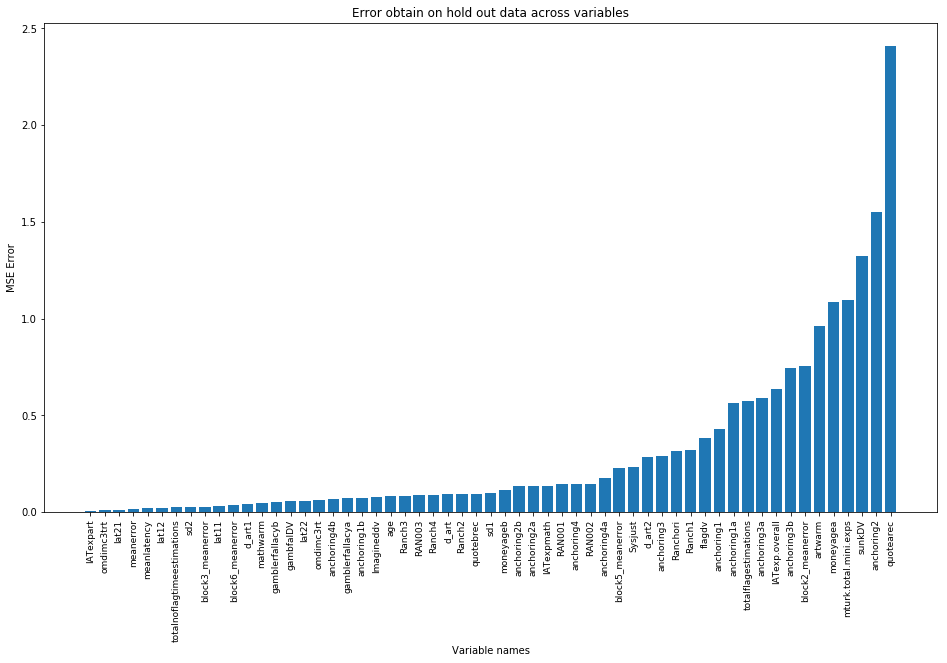

In [139]:
plt.figure(figsize=(16,9))
plt.bar(x, y)
plt.xticks(fontsize = 9, rotation='90')
plt.xlabel('Variable names')
plt.ylabel('MSE Error')
plt.title('Error obtain on hold out data across variables')
plt.show()

In [140]:
x = [x[0] for x in sorted_cat_lg]
y = [x[1] for x in sorted_cat_lg]

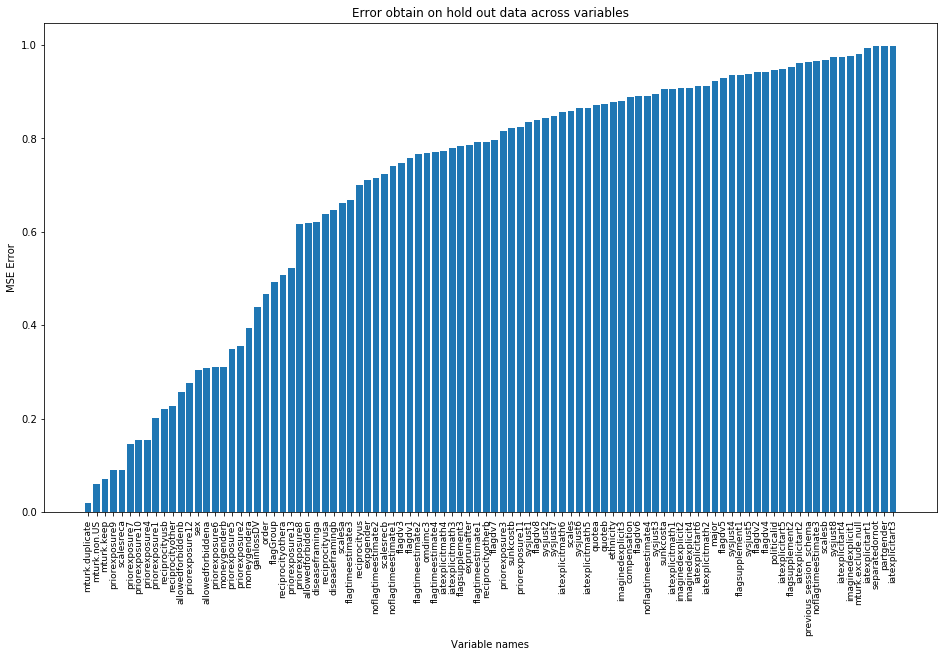

In [141]:
plt.figure(figsize=(16,9))
plt.bar(x, y)
plt.xticks(fontsize = 9, rotation='90')
plt.xlabel('Variable names')
plt.ylabel('MSE Error')
plt.title('Error obtain on hold out data across variables')
plt.show()